<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bike-Sharing" data-toc-modified-id="Bike-Sharing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bike Sharing</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#cnt-Target" data-toc-modified-id="cnt-Target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cnt Target</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></div>

# Bike Sharing

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


**Data size** 

- day.csv : bike sharing counts aggregated on daily basis. Records: 731 days and 16 features
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours and 17 features

Name | Definition 
:---|:---
    instant| 	record index
dteday	| date
season | 	season (1:springer, 2:summer, 3:fall, 4:winter)
yr| 	year (0: 2011, 1:2012)
mnth | 	month ( 1 to 12)
hr | 	hour (0 to 23). it is only in hour.csv
holiday | 	weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
weekday	| day of the week
workingday | 	if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit | 	1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp 	| Normalized temperature in Celsius. The values are divided to 41 (max)
atemp	| Normalized feeling temperature in Celsius. The values are divided to 50 (max)
hum	| Normalized humidity. The values are divided to 100 (max)
windspeed| 	Normalized wind speed. The values are divided to 67 (max)
casual	| count of casual users
registered| 	count of registered users
cnt	| count of total rental bikes including both casual and registered

**Reference**
- Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg. [[Link]](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [35]:
import sys
sys.path.append('../code')

from loaddata import BikeData

# Load Data

I'm not using a hour set. Becuase there is missing values in a `hr` feature.

In [36]:
bike_dataset = BikeData(file_path='../dataset/bike_sharing/')

print(f'train set: {bike_dataset.data.shape[0]} observations and {bike_dataset.data.shape[1]} features')

train set: 731 observations and 16 features


In [11]:
bike_dataset.data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## cnt Target
A `cnt` feature show how many bicycle rented on day.

In [25]:
day.cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

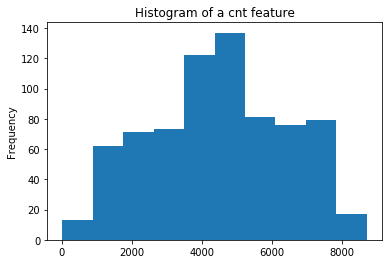

In [23]:
day.cnt.plot.hist(title='Histogram of a cnt feature')

# Preprocessing

I processed train and test set in three steps. This process applied in both the train and the test set.

- Make a `day_trend` from a `dteday` feature. 
- Discard unused features
- Dummy transformation to categorical features

If you want to see this processing code, you can see in my github [code/loaddata.py](https://github.com/TooTouch/WhiteBox-Part2/blob/master/code/loaddata.py).

In [39]:
x_train, y_train = bike_dataset.transform()

print(f'train set: {x_train.shape[0]} observations and {x_train.shape[1]} features')

train set: 731 observations and 26 features
